# **CARGA Y LIMPIEZA DE LA BASE**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
from google.colab import files

uploaded = files.upload()

Saving 2000-01.csv to 2000-01.csv
Saving 2001-02.csv to 2001-02.csv
Saving 2002-03.csv to 2002-03.csv
Saving 2003-04.csv to 2003-04.csv
Saving 2004-05.csv to 2004-05.csv
Saving 2005-06.csv to 2005-06.csv
Saving 2006-07.csv to 2006-07.csv
Saving 2007-08.csv to 2007-08.csv
Saving 2008-09.csv to 2008-09.csv
Saving 2009-10.csv to 2009-10.csv
Saving 2010-11.csv to 2010-11.csv
Saving 2011-12.csv to 2011-12.csv
Saving 2012-13.csv to 2012-13.csv
Saving 2013-14.csv to 2013-14.csv
Saving 2014-15.csv to 2014-15.csv
Saving 2015-16.csv to 2015-16.csv
Saving 2016-17.csv to 2016-17.csv
Saving 2017-18.csv to 2017-18.csv


In [4]:
# Read data from the CSV into a dataframe
raw_data_1 = pd.read_csv('2000-01.csv')
raw_data_2 = pd.read_csv('2001-02.csv')
raw_data_3 = pd.read_csv('2002-03.csv')
raw_data_4 = pd.read_csv('2003-04.csv')
raw_data_5 = pd.read_csv('2004-05.csv')
raw_data_6 = pd.read_csv('2005-06.csv')
raw_data_7 = pd.read_csv('2006-07.csv')
raw_data_8 = pd.read_csv('2007-08.csv')
raw_data_9 = pd.read_csv('2008-09.csv')
raw_data_10 = pd.read_csv('2009-10.csv')
raw_data_11 = pd.read_csv('2010-11.csv')
raw_data_12 = pd.read_csv('2011-12.csv')
raw_data_13 = pd.read_csv('2012-13.csv')
raw_data_14 = pd.read_csv('2013-14.csv')
raw_data_15 = pd.read_csv('2014-15.csv')
raw_data_16 = pd.read_csv('2015-16.csv')
raw_data_17 = pd.read_csv('2016-17.csv')
raw_data_18 = pd.read_csv('2017-18.csv')

In [5]:
raw_data_1

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/01,Man City,Chelsea,1,2,A,1,1,D,...,1,3,8,7,22,18,4,2,0,0
376,E0,19/05/01,Middlesbrough,West Ham,2,1,H,2,1,H,...,7,5,5,6,13,15,0,0,0,0
377,E0,19/05/01,Newcastle,Aston Villa,3,0,H,2,0,H,...,5,1,5,1,10,14,0,5,1,1
378,E0,19/05/01,Southampton,Arsenal,3,2,H,0,1,A,...,7,5,7,5,17,10,1,2,0,0


In [6]:
#Gets all the statistics related to gameplay

columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

In [7]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,19/08/00,Charlton,Man City,4,0,H
1,19/08/00,Chelsea,West Ham,4,2,H
2,19/08/00,Coventry,Middlesbrough,1,3,A
3,19/08/00,Derby,Southampton,2,2,D
4,19/08/00,Leeds,Everton,2,0,H
...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A
376,19/05/01,Middlesbrough,West Ham,2,1,H
377,19/05/01,Newcastle,Aston Villa,3,0,H
378,19/05/01,Southampton,Arsenal,3,2,H


In [8]:
import pandas as pd

# Función para obtener los goles anotados acumulados por equipo y semana de partidos
def get_goals_scored(playing_stat):
    teams = playing_stat['HomeTeam'].unique()
    teams_dict = {team: [] for team in teams}

    for _, match in playing_stat.iterrows():
        teams_dict[match['HomeTeam']].append(match['FTHG'])
        teams_dict[match['AwayTeam']].append(match['FTAG'])

    GoalsScored = pd.DataFrame.from_dict(teams_dict, orient='index').fillna(0).cumsum(axis=1)
    GoalsScored.columns = [f'MW_{i+1}' for i in range(GoalsScored.shape[1])]

    return GoalsScored

# Función para obtener los goles concedidos acumulados por equipo y semana de partidos
def get_goals_conceded(playing_stat):
    teams = playing_stat['HomeTeam'].unique()
    teams_dict = {team: [] for team in teams}

    for _, match in playing_stat.iterrows():
        teams_dict[match['HomeTeam']].append(match['FTAG'])
        teams_dict[match['AwayTeam']].append(match['FTHG'])

    GoalsConceded = pd.DataFrame.from_dict(teams_dict, orient='index').fillna(0).cumsum(axis=1)
    GoalsConceded.columns = [f'MW_{i+1}' for i in range(GoalsConceded.shape[1])]

    return GoalsConceded

# Función para agregar los goles anotados y concedidos acumulados al dataframe principal
def get_gss(playing_stat):
    GS = get_goals_scored(playing_stat)
    GC = get_goals_conceded(playing_stat)

    HTGS, ATGS, HTGC, ATGC = [], [], [], []

    for _, match in playing_stat.iterrows():
        mw = (match.name // 10) + 1  # Determinar la semana de partido
        HTGS.append(GS.loc[match['HomeTeam'], f'MW_{mw}'])
        ATGS.append(GS.loc[match['AwayTeam'], f'MW_{mw}'])
        HTGC.append(GC.loc[match['HomeTeam'], f'MW_{mw}'])
        ATGC.append(GC.loc[match['AwayTeam'], f'MW_{mw}'])

    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC

    return playing_stat

# Aplicar a cada dataset
datasets = [playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
            playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
            playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
            playing_statistics_16, playing_statistics_17, playing_statistics_18]

datasets = [get_gss(df) for df in datasets]


<ipython-input-8-168075ae4489>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
<ipython-input-8-168075ae4489>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
<ipython-input-8-168075ae4489>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [9]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,3,3,1
3,19/08/00,Derby,Southampton,2,2,D,2,2,2,2
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,41,68,65,45
376,19/05/01,Middlesbrough,West Ham,2,1,H,44,45,44,50
377,19/05/01,Newcastle,Aston Villa,3,0,H,44,46,50,43
378,19/05/01,Southampton,Arsenal,3,2,H,40,63,48,38


In [10]:
import pandas as pd

def get_points(result):
    return {'W': 3, 'D': 1, 'L': 0}.get(result, 0)

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    matchres_points = matchres_points.cumsum(axis=1)
    matchres_points.insert(0, 'MW_0', 0)
    return matchres_points

def get_matchres(playing_stat):
    teams = {team: [] for team in playing_stat['HomeTeam'].unique()}

    for _, match in playing_stat.iterrows():
        home_team, away_team, result = match['HomeTeam'], match['AwayTeam'], match['FTR']
        if result == 'H':
            teams[home_team].append('W')
            teams[away_team].append('L')
        elif result == 'A':
            teams[away_team].append('W')
            teams[home_team].append('L')
        else:
            teams[home_team].append('D')
            teams[away_team].append('D')

    return pd.DataFrame(teams, index=[f'MW_{i+1}' for i in range(len(next(iter(teams.values()))))]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP, ATP = [], []

    for i, match in playing_stat.iterrows():
        week = (i // 10) + 1
        HTP.append(cum_pts.loc[match['HomeTeam'], f'MW_{week}'])
        ATP.append(cum_pts.loc[match['AwayTeam'], f'MW_{week}'])

    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

# Aplicar a cada dataset
datasets = [playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
            playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
            playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
            playing_statistics_16, playing_statistics_17, playing_statistics_18]

datasets = [get_agg_points(df) for df in datasets]


<ipython-input-10-8e9dbf277732>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
<ipython-input-10-8e9dbf277732>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
<ipython-input-10-8e9dbf277732>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [11]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4,3,0
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4,3,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,3,3,1,0,3
3,19/08/00,Derby,Southampton,2,2,D,2,2,2,2,1,1
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,41,68,65,45,34,61
376,19/05/01,Middlesbrough,West Ham,2,1,H,44,45,44,50,42,42
377,19/05/01,Newcastle,Aston Villa,3,0,H,44,46,50,43,51,54
378,19/05/01,Southampton,Arsenal,3,2,H,40,63,48,38,52,70


In [12]:
def get_matchres(playing_stat):
    teams = {team: [] for team in playing_stat['HomeTeam'].unique()}

    for _, match in playing_stat.iterrows():
        home_team, away_team, result = match['HomeTeam'], match['AwayTeam'], match['FTR']
        if result == 'H':
            teams[home_team].append('W')
            teams[away_team].append('L')
        elif result == 'A':
            teams[away_team].append('W')
            teams[home_team].append('L')
        else:
            teams[home_team].append('D')
            teams[away_team].append('D')

    matchres = pd.DataFrame.from_dict(teams, orient='index')
    matchres.columns = range(1, len(matchres.columns) + 1)  # Asegurar que las columnas estén numeradas del 1 al 38
    return matchres


In [13]:
def get_form(playing_stat, num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num, 39):
        form_final[i] = form.loc[:, range(i - num + 1, i + 1)].apply(lambda x: ''.join(x.astype(str)), axis=1)
    return form_final

def add_form(playing_stat, num):
    form = get_form(playing_stat, num)
    num_matches = num * 10
    h = ['M'] * num_matches  # 'M' indica que la forma no está disponible
    a = ['M'] * num_matches

    for i in range(num_matches, 380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        week = (i // 10) + 1  # Determina la semana de partidos

        if week in form.columns:
            h.append(form.at[ht, week][num-1])
            a.append(form.at[at, week][num-1])
        else:
            h.append('M')
            a.append('M')

    playing_stat[f'HM{num}'] = h
    playing_stat[f'AM{num}'] = a

    return playing_stat

def add_form_df(playing_statistics):
    for num in range(1, 6):
        playing_statistics = add_form(playing_statistics, num)
    return playing_statistics

# Aplicar cambios a cada dataset
datasets = [playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
            playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
            playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
            playing_statistics_16, playing_statistics_17, playing_statistics_18]

datasets = [add_form_df(df) for df in datasets]


<ipython-input-13-5e8b9eed955f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat[f'HM{num}'] = h
<ipython-input-13-5e8b9eed955f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat[f'AM{num}'] = a
<ipython-input-13-5e8b9eed955f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [14]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4,...,M,M,M,M,M,M,M,M,M,M
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4,...,M,M,M,M,M,M,M,M,M,M
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,3,3,1,...,M,M,M,M,M,M,M,M,M,M
3,19/08/00,Derby,Southampton,2,2,D,2,2,2,2,...,M,M,M,M,M,M,M,M,M,M
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2,...,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,41,68,65,45,...,L,W,L,W,L,W,L,W,L,W
376,19/05/01,Middlesbrough,West Ham,2,1,H,44,45,44,50,...,W,L,W,L,W,L,W,L,W,L
377,19/05/01,Newcastle,Aston Villa,3,0,H,44,46,50,43,...,W,L,W,L,W,L,W,L,W,L
378,19/05/01,Southampton,Arsenal,3,2,H,40,63,48,38,...,W,L,W,L,W,L,W,L,W,L


In [15]:
# Orden deseado de las columnas
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5']

# Lista de DataFrames
playing_statistics_list = [playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
                           playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
                           playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
                           playing_statistics_16, playing_statistics_17, playing_statistics_18]

# Reorganizar las columnas de cada DataFrame en un bucle
for i in range(len(playing_statistics_list)):
    playing_statistics_list[i] = playing_statistics_list[i][cols]

# Asignar los DataFrames reorganizados de vuelta a las variables originales
(playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
 playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
 playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
 playing_statistics_16, playing_statistics_17, playing_statistics_18) = playing_statistics_list

In [16]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4,...,M,M,M,M,M,M,M,M,M,M
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4,...,M,M,M,M,M,M,M,M,M,M
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,3,3,1,...,M,M,M,M,M,M,M,M,M,M
3,19/08/00,Derby,Southampton,2,2,D,2,2,2,2,...,M,M,M,M,M,M,M,M,M,M
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2,...,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,41,68,65,45,...,L,L,L,L,L,W,W,W,W,W
376,19/05/01,Middlesbrough,West Ham,2,1,H,44,45,44,50,...,W,W,W,W,W,L,L,L,L,L
377,19/05/01,Newcastle,Aston Villa,3,0,H,44,46,50,43,...,W,W,W,W,W,L,L,L,L,L
378,19/05/01,Southampton,Arsenal,3,2,H,40,63,48,38,...,W,W,W,W,W,L,L,L,L,L


In [17]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1) % 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

# Lista de DataFrames
playing_statistics_list = [playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
                           playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
                           playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
                           playing_statistics_16, playing_statistics_17, playing_statistics_18]

# Aplicar la función a cada DataFrame
playing_statistics_list = [get_mw(df) for df in playing_statistics_list]

# Asignar los DataFrames de vuelta a sus variables originales
(playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
 playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
 playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
 playing_statistics_16, playing_statistics_17, playing_statistics_18) = playing_statistics_list


<ipython-input-17-5edad7093e58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['MW'] = MatchWeek
<ipython-input-17-5edad7093e58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['MW'] = MatchWeek
<ipython-input-17-5edad7093e58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [18]:
playing_statistics_1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4,...,M,M,M,M,M,M,M,M,M,1
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4,...,M,M,M,M,M,M,M,M,M,1
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,3,3,1,...,M,M,M,M,M,M,M,M,M,1
3,19/08/00,Derby,Southampton,2,2,D,2,2,2,2,...,M,M,M,M,M,M,M,M,M,1
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2,...,M,M,M,M,M,M,M,M,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/01,Man City,Chelsea,1,2,A,41,68,65,45,...,L,L,L,L,W,W,W,W,W,38
376,19/05/01,Middlesbrough,West Ham,2,1,H,44,45,44,50,...,W,W,W,W,L,L,L,L,L,38
377,19/05/01,Newcastle,Aston Villa,3,0,H,44,46,50,43,...,W,W,W,W,L,L,L,L,L,38
378,19/05/01,Southampton,Arsenal,3,2,H,40,63,48,38,...,W,W,W,W,L,L,L,L,L,38


In [19]:
import pandas as pd

# Combinar los DataFrames en uno solo
playing_stat = pd.concat([playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4, playing_statistics_5,
                          playing_statistics_6, playing_statistics_7, playing_statistics_8, playing_statistics_9, playing_statistics_10,
                          playing_statistics_11, playing_statistics_12, playing_statistics_13, playing_statistics_14, playing_statistics_15,
                          playing_statistics_16, playing_statistics_17, playing_statistics_18], ignore_index=True)

# Función para calcular puntos basados en la forma
def get_form_points(string):
    points = {'W': 3, 'D': 1, 'L': 0}
    return sum(points[char] for char in string if char in points)

# Crear cadenas de forma para equipos locales y visitantes
playing_stat['HTFormPtsStr'] = playing_stat[['HM1', 'HM2', 'HM3', 'HM4', 'HM5']].apply(lambda x: ''.join(x), axis=1)
playing_stat['ATFormPtsStr'] = playing_stat[['AM1', 'AM2', 'AM3', 'AM4', 'AM5']].apply(lambda x: ''.join(x), axis=1)

# Calcular puntos de forma
playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Funciones para identificar rachas de victorias y derrotas
def streak_check(string, streak):
    return 1 if streak in string else 0

# Aplicar funciones de rachas a equipos locales y visitantes
streaks = {
    'HTWinStreak3': 'WWW',
    'HTWinStreak5': 'WWWWW',
    'HTLossStreak3': 'LLL',
    'HTLossStreak5': 'LLLLL',
    'ATWinStreak3': 'WWW',
    'ATWinStreak5': 'WWWWW',
    'ATLossStreak3': 'LLL',
    'ATLossStreak5': 'LLLLL'
}

for col, streak in streaks.items():
    if 'HT' in col:
        playing_stat[col] = playing_stat['HTFormPtsStr'].apply(streak_check, args=(streak,))
    else:
        playing_stat[col] = playing_stat['ATFormPtsStr'].apply(streak_check, args=(streak,))

# Verificar las columnas del DataFrame resultante
print(playing_stat.columns)

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')


In [20]:
# Diferencia de Goles
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diferencia de Puntos
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [21]:
# Escalar DiffPts, DiffFormPts, HTGD, ATGD por semana de partido
cols = ['HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'HTP', 'ATP']
playing_stat['MW'] = playing_stat['MW'].astype(float)

# Utilizar operaciones vectorizadas para escalar las columnas
playing_stat[cols] = playing_stat[cols].div(playing_stat['MW'], axis=0)

In [22]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'

playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (desde 2013 hasta 2015)
playing_stat_test = playing_stat[4940:5700]

In [23]:
#Guardando el dataset final
playing_stat.to_csv('final_dataset.csv')

In [24]:
#Guardando el test set
playing_stat_test.to_csv("test_set.csv")

In [25]:
# Cargando el dataset final y el dataset test
dataset = pd.read_csv('final_dataset.csv')
dataset_test = pd.read_csv("test_set.csv")

In [26]:
print(dataset)

      Unnamed: 0      Date     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTGS  \
0              0  19/08/00     Charlton       Man City     4     0   H     4   
1              1  19/08/00      Chelsea       West Ham     4     2   H     4   
2              2  19/08/00     Coventry  Middlesbrough     1     3  NH     1   
3              3  19/08/00        Derby    Southampton     2     2  NH     2   
4              4  19/08/00        Leeds        Everton     2     0   H     2   
...          ...       ...          ...            ...   ...   ...  ..   ...   
6835        6835  13/05/18    Newcastle        Chelsea     3     0   H    39   
6836        6836  13/05/18  Southampton       Man City     0     1  NH    37   
6837        6837  13/05/18      Swansea          Stoke     1     2  NH    28   
6838        6838  13/05/18    Tottenham      Leicester     5     4   H    74   
6839        6839  13/05/18     West Ham        Everton     3     1   H    48   

      ATGS  HTGC  ...  HTLossStreak3  H

In [27]:
playing_stat.head(15)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,4,0,0,4,...,0,0,0,0,0,0,4.0,-4.0,3.0,0.0
1,19/08/00,Chelsea,West Ham,4,2,H,4,2,2,4,...,0,0,0,0,0,0,2.0,-2.0,3.0,0.0
2,19/08/00,Coventry,Middlesbrough,1,3,NH,1,3,3,1,...,0,0,0,0,0,0,-2.0,2.0,-3.0,0.0
3,19/08/00,Derby,Southampton,2,2,NH,2,2,2,2,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,19/08/00,Leeds,Everton,2,0,H,2,0,0,2,...,0,0,0,0,0,0,2.0,-2.0,3.0,0.0
5,19/08/00,Leicester,Aston Villa,0,0,NH,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
6,19/08/00,Liverpool,Bradford,1,0,H,1,0,0,1,...,0,0,0,0,0,0,1.0,-1.0,3.0,0.0
7,19/08/00,Sunderland,Arsenal,1,0,H,1,0,0,1,...,0,0,0,0,0,0,1.0,-1.0,3.0,0.0
8,19/08/00,Tottenham,Ipswich,3,1,H,3,1,1,3,...,0,0,0,0,0,0,2.0,-2.0,3.0,0.0
9,20/08/00,Man United,Newcastle,2,0,H,2,0,0,2,...,0,0,0,0,0,0,2.0,-2.0,3.0,0.0


In [28]:
playing_stat_test

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
4940,17/08/13,Arsenal,Aston Villa,1,3,NH,1,3,3,1,...,0,0,0,0,0,0,-2.000000,2.000000,-3.000000,0.000000
4941,17/08/13,Liverpool,Stoke,1,0,H,1,0,0,1,...,0,0,0,0,0,0,1.000000,-1.000000,3.000000,0.000000
4942,17/08/13,Norwich,Everton,2,2,NH,2,2,2,2,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4943,17/08/13,Sunderland,Fulham,0,1,NH,0,1,1,0,...,0,0,0,0,0,0,-1.000000,1.000000,-3.000000,0.000000
4944,17/08/13,Swansea,Man United,1,4,NH,1,4,4,1,...,0,0,0,0,0,0,-3.000000,3.000000,-3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,24/05/15,Hull,Man United,0,0,NH,33,62,51,37,...,0,0,0,0,0,0,-0.473684,0.657895,-0.921053,0.000000
5696,24/05/15,Leicester,QPR,5,1,H,46,42,55,73,...,0,0,0,0,1,1,-0.236842,-0.815789,0.289474,0.394737
5697,24/05/15,Man City,Southampton,2,0,H,83,54,38,33,...,0,0,0,0,1,1,1.184211,0.552632,0.500000,0.394737
5698,24/05/15,Newcastle,West Ham,2,0,H,40,44,63,47,...,0,0,0,0,1,1,-0.605263,-0.078947,-0.210526,0.394737


In [29]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

In [30]:
cantidad_datos_entrenamiento = len(dataset)
print(f"La cantidad de datos en el dataset de prueba es: {cantidad_datos_entrenamiento}")
cantidad_datos_test = len(dataset_test)
print(f"La cantidad de datos en el dataset de prueba es: {cantidad_datos_test}")

La cantidad de datos en el dataset de prueba es: 6840
La cantidad de datos en el dataset de prueba es: 760


In [31]:
conteo_entrenamiento = dataset['FTR'].value_counts()
conteo_test = dataset_test['FTR'].value_counts()

conteo_nh_entrenamiento = conteo_entrenamiento.get('NH', 0)
conteo_h_entrenamiento = conteo_entrenamiento.get('H', 0)
conteo_nh_test = conteo_test.get('NH', 0)
conteo_h_test = conteo_test.get('H', 0)

print(f"NH Entrenamiento: {conteo_nh_entrenamiento}")
print(f"H Entrenamiento: {conteo_h_entrenamiento}")
print(f"NH Test: {conteo_nh_test}")
print(f"H Test: {conteo_h_test}")

NH Entrenamiento: 3664
H Entrenamiento: 3176
NH Test: 409
H Test: 351


# **MATRIZ DE CORRELACIÓN DE LA BASE DE DATOS**

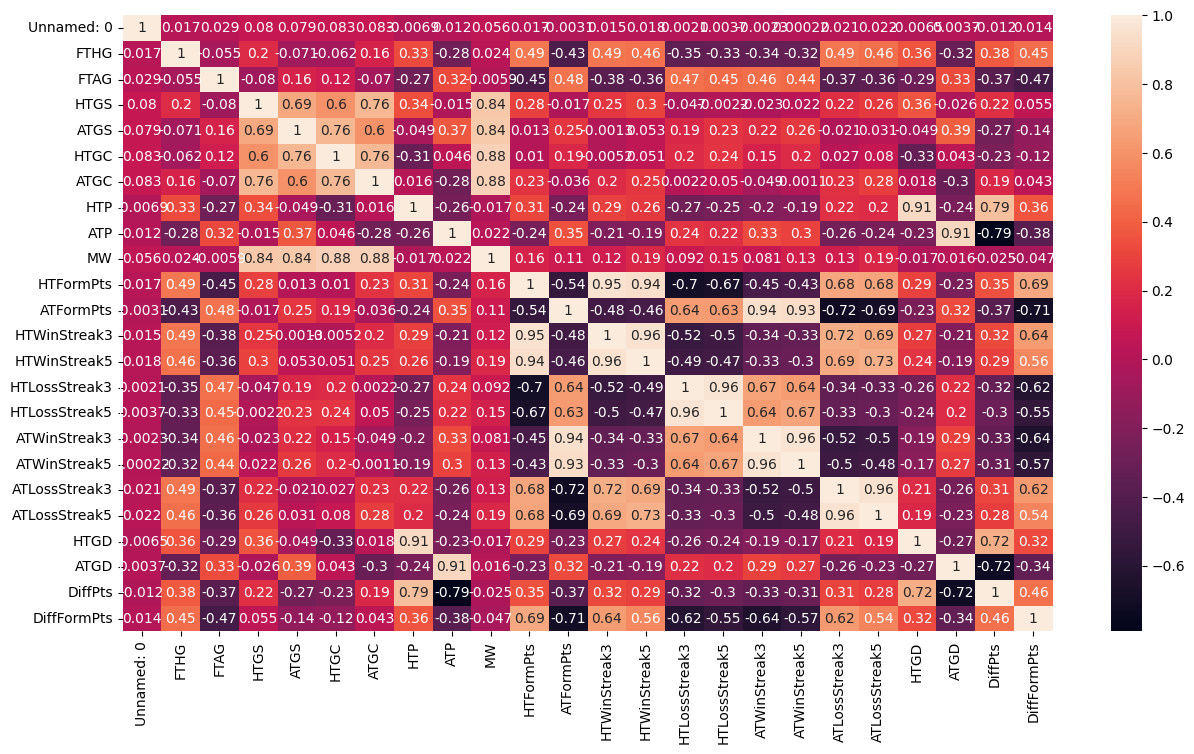

In [32]:
# Seleccionar solo columnas numéricas
numeric_cols = dataset.select_dtypes(include=['number'])

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_cols.corr(), annot=True)

# Mostrar el gráfico
plt.show()

In [33]:
# Crear una copia del DataFrame y eliminar columnas no relevantes o redundantes
dataset_cleaned = dataset.copy().drop(columns=[
    'Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam',  # Columnas identificadoras y de fecha
    'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC',  # Columnas de goles
    'HM4', 'HM5', 'AM4', 'AM5',  # Columnas de rachas menos relevantes
    'MW', 'HTFormPtsStr', 'ATFormPtsStr',  # Columnas de cadena de forma no numéricas
    'HTFormPts', 'ATFormPts',  # Columnas de puntos de forma redundantes
    'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',  # Columnas de rachas locales redundantes
    'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',  # Columnas de rachas visitantes redundantes
    'DiffPts'  # Columna de diferencia de puntos redundante
])

# Mostrar las columnas restantes para verificar
print("Columnas restantes después de la limpieza:")
print(dataset_cleaned.columns)

Columnas restantes después de la limpieza:
Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD',
       'ATGD', 'DiffFormPts'],
      dtype='object')


In [34]:
print(dataset_cleaned.head)

<bound method NDFrame.head of      FTR       HTP       ATP HM1 HM2 HM3 AM1 AM2 AM3      HTGD      ATGD  \
0      H  3.000000  0.000000   M   M   M   M   M   M  4.000000 -4.000000   
1      H  3.000000  0.000000   M   M   M   M   M   M  2.000000 -2.000000   
2     NH  0.000000  3.000000   M   M   M   M   M   M -2.000000  2.000000   
3     NH  1.000000  1.000000   M   M   M   M   M   M  0.000000  0.000000   
4      H  3.000000  0.000000   M   M   M   M   M   M  2.000000 -2.000000   
...   ..       ...       ...  ..  ..  ..  ..  ..  ..       ...       ...   
6835   H  1.157895  1.842105   W   W   W   L   L   L -0.210526  0.631579   
6836  NH  0.947368  2.631579   L   L   L   W   W   W -0.500000  2.078947   
6837  NH  0.868421  0.868421   L   L   L   W   W   W -0.736842 -0.868421   
6838   H  2.026316  1.236842   W   W   W   L   L   L  1.000000 -0.105263   
6839   H  1.105263  1.289474   W   W   W   L   L   L -0.526316 -0.368421   

      DiffFormPts  
0        0.000000  
1        0.000000

In [35]:
dataset_cleaned.keys()

Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD',
       'ATGD', 'DiffFormPts'],
      dtype='object')

In [36]:
dataset_cleaned

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,H,3.000000,0.000000,M,M,M,M,M,M,4.000000,-4.000000,0.000000
1,H,3.000000,0.000000,M,M,M,M,M,M,2.000000,-2.000000,0.000000
2,NH,0.000000,3.000000,M,M,M,M,M,M,-2.000000,2.000000,0.000000
3,NH,1.000000,1.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,H,3.000000,0.000000,M,M,M,M,M,M,2.000000,-2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6835,H,1.157895,1.842105,W,W,W,L,L,L,-0.210526,0.631579,0.394737
6836,NH,0.947368,2.631579,L,L,L,W,W,W,-0.500000,2.078947,-0.394737
6837,NH,0.868421,0.868421,L,L,L,W,W,W,-0.736842,-0.868421,-0.394737
6838,H,2.026316,1.236842,W,W,W,L,L,L,1.000000,-0.105263,0.394737


In [37]:
def calculate_home_win_rate(df):
    # Número total de partidos
    n_matches = df.shape[0]

    # calcular partidos como local ganados
    n_homewins = (df.FTR == 'H').sum()

    # Ratio de victoria local
    win_rate = (n_homewins / n_matches) * 100

    # Resultados
    print("Total number of matches: {}".format(n_matches))
    print("Number of matches won by home team: {}".format(n_homewins))
    print("Win rate of home team: {:.2f}%".format(win_rate))

# Aplicar la función a dataset limpio
calculate_home_win_rate(dataset_cleaned)


Total number of matches: 6840
Number of matches won by home team: 3176
Win rate of home team: 46.43%


# **VISUALIZACIÓN**

  FTR  HTP  ATP HM1 HM2 HM3 AM1 AM2 AM3  HTGD  ATGD  DiffFormPts
0   H  3.0  0.0   M   M   M   M   M   M   4.0  -4.0          0.0
1   H  3.0  0.0   M   M   M   M   M   M   2.0  -2.0          0.0
2  NH  0.0  3.0   M   M   M   M   M   M  -2.0   2.0          0.0
3  NH  1.0  1.0   M   M   M   M   M   M   0.0   0.0          0.0
4   H  3.0  0.0   M   M   M   M   M   M   2.0  -2.0          0.0


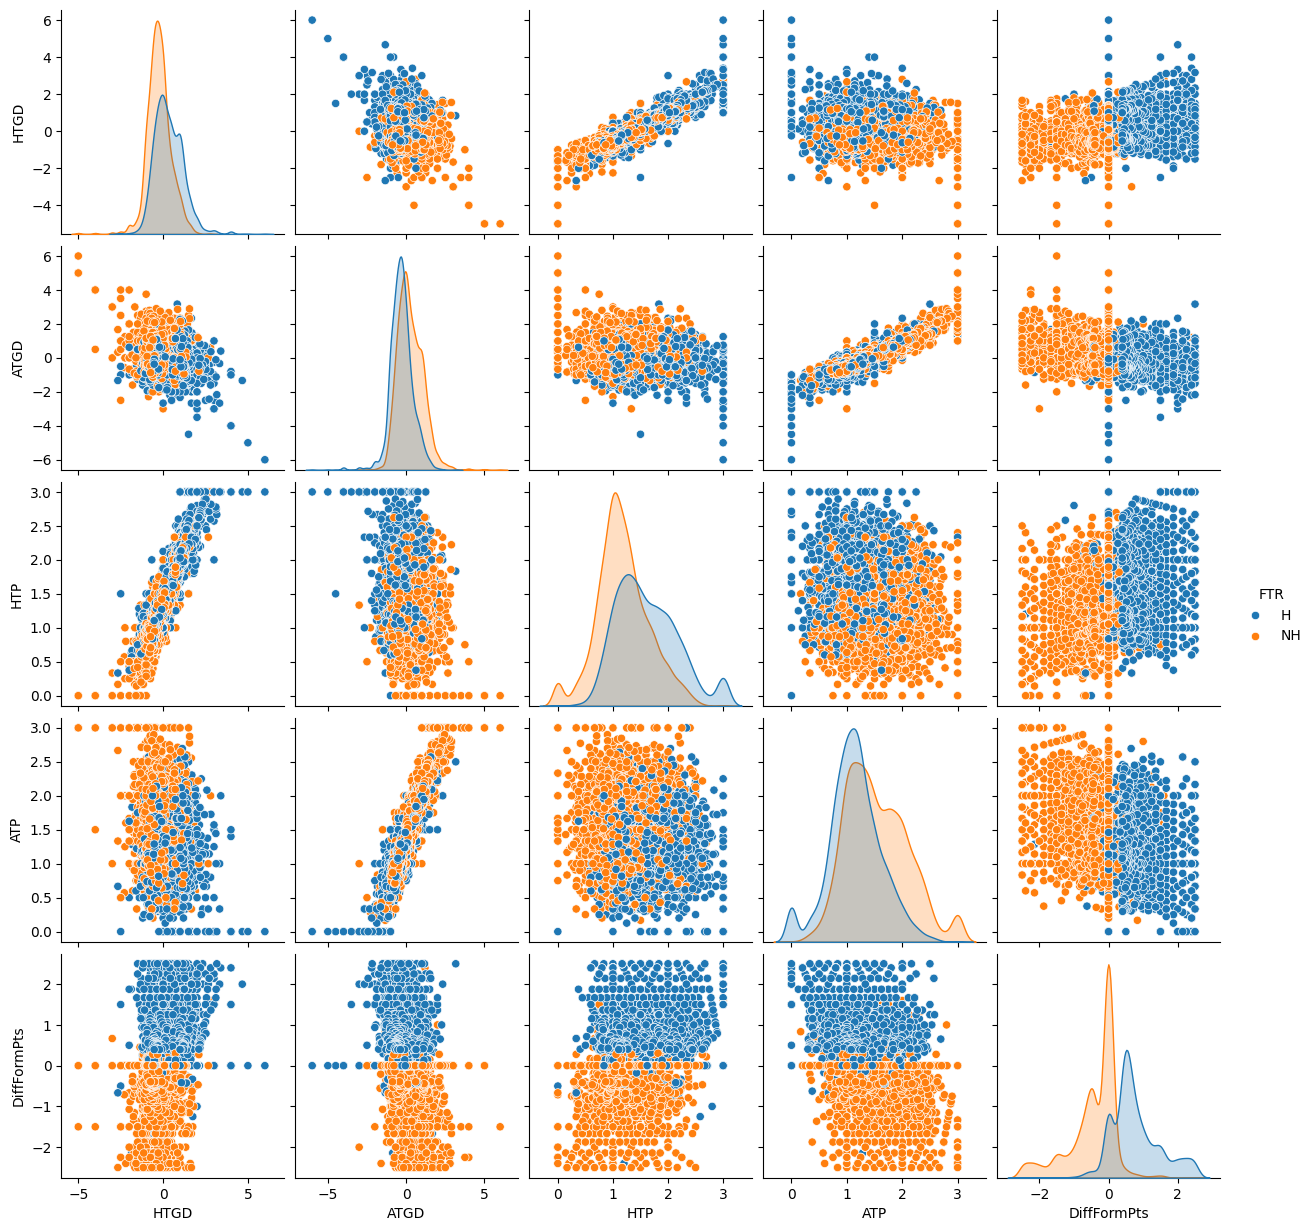

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Distribución
print(dataset_cleaned.head())

# Seaborn pairplot
sns.pairplot(dataset_cleaned[['HTGD', 'ATGD', 'HTP', 'ATP', 'DiffFormPts', 'FTR']], hue='FTR', diag_kind='kde', height=2.5)
plt.show()


In [39]:
np.unique(dataset_cleaned['HM1'])

array(['D', 'L', 'M', 'W'], dtype=object)

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

# Paso 1: Reemplazar 'M' con NaN en la columna 'HM1'
dataset_cleaned['HM1'] = dataset_cleaned['HM1'].replace('M', np.nan)

# Decidir cómo manejar los NaN
dataset_cleaned = dataset_cleaned.dropna()

# Paso 2: Separar el conjunto de características y la variable objetivo
X_all = dataset_cleaned.drop(['FTR'], axis=1)
y_all = dataset_cleaned['FTR']

# Paso 3: Columnas a estandarizar
cols = ['HTGD', 'ATGD', 'HTP', 'ATP']
for col in cols:
    X_all[col] = scale(X_all[col])

# Verificar las primeras filas
print(X_all.head())
print(y_all.head())


         HTP       ATP HM1 HM2 HM3 AM1 AM2 AM3      HTGD      ATGD  \
10  0.236132  0.260962   W   M   M   L   M   M  0.632962 -0.645011   
11  0.236132  0.260962   W   M   M   L   M   M  0.632962  0.007463   
12 -1.675593  1.221734   D   M   M   D   M   M -1.309043  1.312411   
13  1.191995  1.221734   D   M   M   D   M   M  1.280297  1.312411   
14  0.236132  0.260962   W   M   M   L   M   M  0.632962  0.659937   

    DiffFormPts  
10          1.5  
11          1.5  
12          0.0  
13          0.0  
14          1.5  
10     H
11     H
12    NH
13    NH
14     H
Name: FTR, dtype: object


In [41]:
# Convertir las columnas categóricas a tipo string
categorical_columns = ['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3']
X_all[categorical_columns] = X_all[categorical_columns].astype('str')

# Preprocesar las características
def preprocess_features(X):
    ''' Preprocesses the football data and converts categorical variables into dummy variables. '''
    # Variables dummy
    return pd.get_dummies(X)

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (27 total features):
['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W']


# **DIVIDIR EL DATASET**

In [47]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all,
    test_size=0.3,  # Usar el 30% de los datos para el conjunto de prueba
    random_state=2000,  # Fijar una semilla para la reproducibilidad, 2000 para contextualizar el año del comienzo de mi base
    stratify=y_all  # Mantener la proporción de las clases en y_all
)

# Verificar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento: X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Tamaño del conjunto de prueba: X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


Tamaño del conjunto de entrenamiento: X_train: (4662, 27), y_train: (4662,)
Tamaño del conjunto de prueba: X_test: (1998, 27), y_test: (1998,)


In [48]:
print(X_all)
print(y_all)

           HTP       ATP      HTGD      ATGD  DiffFormPts  HM1_D  HM1_L  \
10    0.236132  0.260962  0.632962 -0.645011     1.500000  False  False   
11    0.236132  0.260962  0.632962  0.007463     1.500000  False  False   
12   -1.675593  1.221734 -1.309043  1.312411     0.000000   True  False   
13    1.191995  1.221734  1.280297  1.312411     0.000000   True  False   
14    0.236132  0.260962  0.632962  0.659937     1.500000  False  False   
...        ...       ...       ...       ...          ...    ...    ...   
6835 -0.417879  0.918332 -0.286935  0.831641     0.394737  False  False   
6836 -0.820348  2.435341 -0.661708  2.720381    -0.394737  False   True   
6837 -0.971273 -0.952645 -0.968341 -1.125782    -0.394737  False   True   
6838  1.242304 -0.244707  1.280297 -0.129900     0.394737  False  False   
6839 -0.518496 -0.143573 -0.695779 -0.473308     0.394737  False  False   

      HM1_W  HM2_D  HM2_L  ...  AM1_L  AM1_W  AM2_D  AM2_L  AM2_M  AM2_W  \
10     True  False  Fal

In [49]:
np.unique(y_train)

array(['H', 'NH'], dtype=object)

# **RANDOM FOREST**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el clasificador Random Forest
classifier = RandomForestClassifier(criterion='gini',
                             n_estimators=300,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             n_jobs=-1,
                             random_state=2000)

# Entrenar el clasificador con los datos de entrenamiento
classifier.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular y mostrar la precisión
accuracy = 1 - np.sum(y_pred != y_test) / len(y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.93
              precision    recall  f1-score   support

           H       0.93      0.92      0.92       929
          NH       0.93      0.94      0.93      1069

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[ 856   73]
 [  69 1000]]


In [55]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

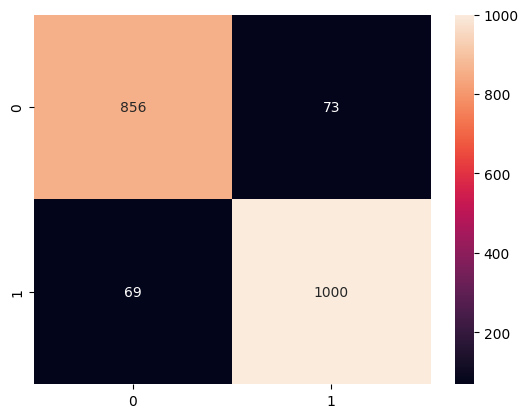

In [56]:
sns.heatmap(cm, annot=True, fmt='d')

# **XGBOOST**

In [58]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicializar el clasificador XGBoost con la semilla fija
classifier = XGBClassifier(seed=2000)

# Entrenar el clasificador con los datos de entrenamiento
classifier.fit(X_train, y_train_encoded)

# Predicciones sobre el conjunto de prueba
y_pred_encoded = classifier.predict(X_test)

# Convertir las predicciones a etiquetas originales
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calcular y mostrar la precisión
accuracy = 1 - np.sum(y_pred != y_test) / len(y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.92
              precision    recall  f1-score   support

           H       0.92      0.91      0.92       929
          NH       0.92      0.93      0.93      1069

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998

[[845  84]
 [ 70 999]]


In [59]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

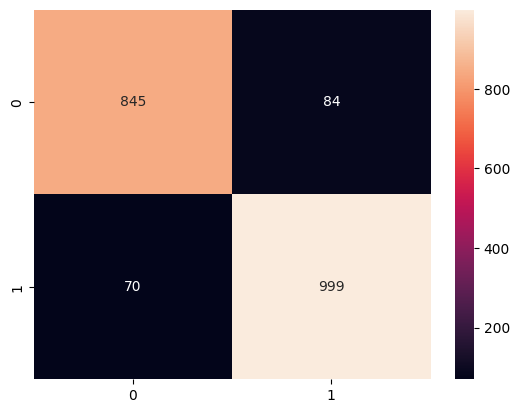

In [61]:
sns.heatmap(cm, annot=True,fmt='d')

# **OPTIMIZACIÓN DE PARÁMETROS**: Para encontrar mejor rendimiento

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Parámetros para GridSearchCV
parameters = {
    'learning_rate': [0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1],
    'reg_alpha': [1e-5]
}

# Crear una función de evaluación basada en el F1-score
f1_scorer = make_scorer(f1_score)

# Inicializar el clasificador XGBoost
clf = XGBClassifier(seed=2000)

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_obj = GridSearchCV(clf, scoring=f1_scorer, param_grid=parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train_encoded)

# Obtener el mejor estimador
clf = grid_obj.best_estimator_
print("Mejor clasificador: ", clf)

# Evaluar el modelo
f1, acc = predict_labels(clf, X_train, y_train_encoded)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))

f1, acc = predict_labels(clf, X_test, y_test_encoded)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

Mejor clasificador:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
F1 score and accuracy score for training set: 0.9364 , 0.9322.
F1 score and accuracy score for test set: 0.9369 , 0.9329.


              precision    recall  f1-score   support

           H       0.92      0.94      0.93       929
          NH       0.94      0.93      0.94      1069

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



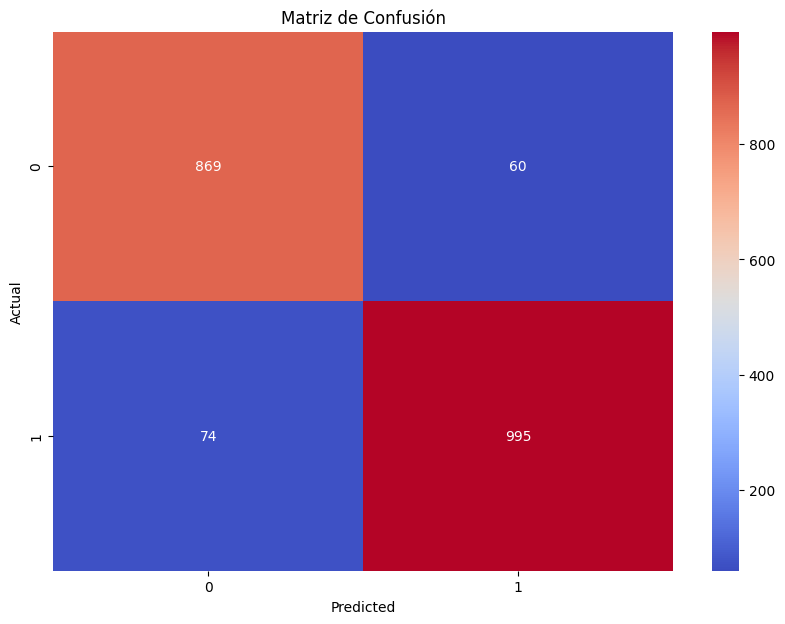

In [66]:
# Predicciones finales en el conjunto de prueba
y_pred_encoded = clf.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Dibujar la matriz de confusión usando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusión')
plt.show()